In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Train.csv to Train.csv


**Read the dataset**

In [ ]:
import pandas as pd
pd.set_option('display.max_rows', None)
df = pd.read_csv('./Train.csv')
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

**Data Preprocessing**

In [ ]:
df.apply(lambda x:sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)
df.apply(lambda x:sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df.pivot_table(values='Item_Outlet_Sales',index=['Item_Type','Outlet_Size','Outlet_Type','Outlet_Location_Type'])

Item_Outlet_Sales
Item_Type             Outlet_Size Outlet_Type       Outlet_Location_Type                   
Baking Goods          High        Supermarket Type1 Tier 3                      2050.901134
                      Medium      Grocery Store     Tier 3                       254.605090
                                  Supermarket Type1 Tier 1                      2110.051342
                                                    Tier 2                      2084.615144
                                  Supermarket Type2 Tier 3                      1780.368782
                                  Supermarket Type3 Tier 3                      3248.872417
                      Small       Grocery Store     Tier 1                       328.688428
                                  Supermarket Type1 Tier 1                      2281.267334
                                                    Tier 2                      1985.376435
Breads                High        Supermarket Type1 Tier 3                      2080.731528
                      Medium      Grocery Store     Tier 3                       450.433282
                                  Supermarket Type1 Tier 1                      2419.623728
                                                    Tier 2                      2084.958753
                                  Supermarket Type2 Tier 3                      2022.404489
                                  Supermarket Type3 Tier 3                      3565.122748
                      Small       Grocery Store     Tier 1                       309.222487
                                  Supermarket Type1 Tier 1                      2764.247954
                                                    Tier 2                      2636.430248
Breakfast             High        Supermarket Type1 Tier 3                      2104.286508
                      Medium      Grocery Store     Tier 3                       453.483778
                                  Supermarket Type1 Tier 1                      2324.205369
                                                    Tier 2                      2101.779282
                                  Supermarket Type2 Tier 3                      1874.670867
                                  Supermarket Type3 Tier 3                      4584.759327
                      Small       Grocery Store     Tier 1                       376.243580
                                  Supermarket Type1 Tier 1                      1659.972560
                                                    Tier 2                      3111.749460
Canned                High        Supermarket Type1 Tier 3                      2211.265203
                      Medium      Grocery Store     Tier 3                       257.702646
                                  Supermarket Type1 Tier 1                      2061.763979
                                                    Tier 2                      2448.677378
                                  Supermarket Type2 Tier 3                      1867.714110
                                  Supermarket Type3 Tier 3                      3779.866814
                      Small       Grocery Store     Tier 1                       440.514305
                                  Supermarket Type1 Tier 1                      2403.954125
                                                    Tier 2                      2473.977954
Dairy                 High        Supermarket Type1 Tier 3                      2453.181713
                      Medium      Grocery Store     Tier 3                       355.986228
                                  Supermarket Type1 Tier 1                      2303.599713
                                                    Tier 2                      2381.855269
                                  Supermarket Type2 Tier 3                      2083.981362
                                  Supermarket Type3 Tier 3                      3915.182245
                      Smal

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Type'].value_counts()
df['Outlet_Size'].value_counts()
df['Outlet_Type'].value_counts()
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

**Features Selection**

In [ ]:
#categorical variables
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
category_features = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
label_en = LabelEncoder()
for feature in category_features:
  df[feature] = label_en.fit_transform(df[feature])  
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
miss_bool = (df['Item_Visibility'] == 0)
df.iloc[[miss_bool],3] = df['Item_Visibility'].mean()
df.head(5)

/usr/local/lib/python3.6/dist-packages/pandas/core/internals/blocks.py:920: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  values[indexer] = value


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.066132,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.066132,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
df['Outlet_Establishment_Year'].max()
df['Outlet_Establishment_Year'] = 2009 - df['Outlet_Establishment_Year']
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,10,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,0,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,10,1,0,1,2097.2700
3,1121,19.20,1,0.066132,6,182.0950,0,11,1,2,0,732.3800
4,1297,8.93,0,0.066132,9,53.8614,1,22,0,2,1,994.7052


In [ ]:
y = df.iloc[:,-1]
df.drop(['Item_Outlet_Sales','Outlet_Identifier','Item_Identifier'],axis=1,inplace=True)
df.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,10,1,0,1
1,5.92,1,0.019278,14,48.2692,0,1,2,2
2,17.50,0,0.016760,10,141.6180,10,1,0,1
3,19.20,1,0.066132,6,182.0950,11,1,2,0
4,8.93,0,0.066132,9,53.8614,22,0,2,1


In [ ]:
#backward elimination
import statsmodels.api as sm
import numpy as np
def backwardElimination(x,sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_ols = sm.OLS(y, x).fit()
        maxVar = max(regressor_ols.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_ols.pvalues[j] == maxVar):
                    x = np.delete(x,j,1)
    print(regressor_ols.summary())
    return x

x = np.append(arr=np.ones((len(x),1)).astype(int),values=x,axis=1)
sl = 0.01
x_opt = x
x_opt = backwardElimination(x_opt, sl)
x_opt.shape

                                 OLS Regression Results                                
Dep. Variable:      Item_Outlet_Sales   R-squared (uncentered):                   0.834
Model:                            OLS   Adj. R-squared (uncentered):              0.834
Method:                 Least Squares   F-statistic:                              4755.
Date:                Fri, 07 Aug 2020   Prob (F-statistic):                        0.00
Time:                        11:09:21   Log-Likelihood:                         -71996.
No. Observations:                8523   AIC:                                  1.440e+05
Df Residuals:                    8514   BIC:                                  1.441e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

(8523, 9)

**Model Evaluation**

Linear Regressor Root mean square error: 1129.922051072661


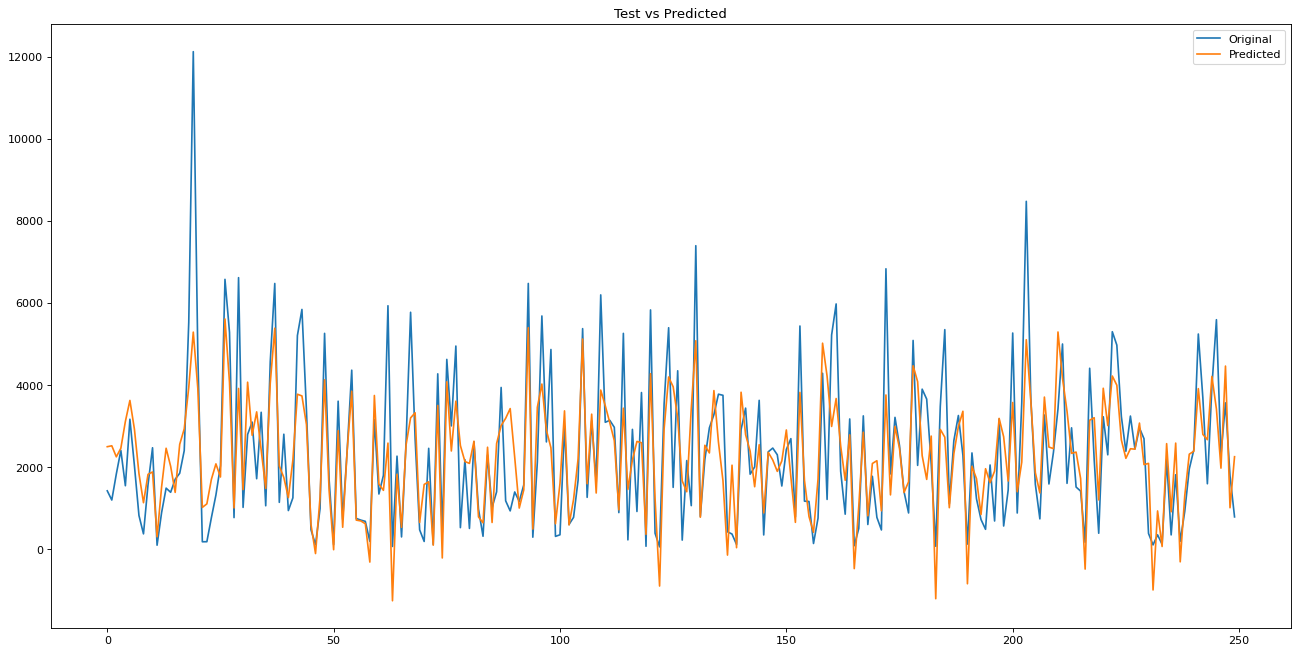

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score
from math import sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def plot_result(y_test,pred):
    x_ax = range(len(y_test[:250]))
    plt.figure(figsize=(20, 10), dpi=80)
    plt.plot(x_ax, y_test[:250], label="Original")
    plt.plot(x_ax, pred[:250], label="Predicted")
    plt.title("Test vs Predicted")
    plt.legend()
    plt.show()

x_train,x_test,y_train,y_test = train_test_split(x_opt,y,test_size = 0.2,random_state=0)
#linear regression
lr = LinearRegression(normalize=True)
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
rmse = sqrt(mean_squared_error(y_test, pred))
print("Linear Regressor Root mean square error:",rmse)
plot_result(y_test,pred)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR Root mean square error: 1081.679435607744


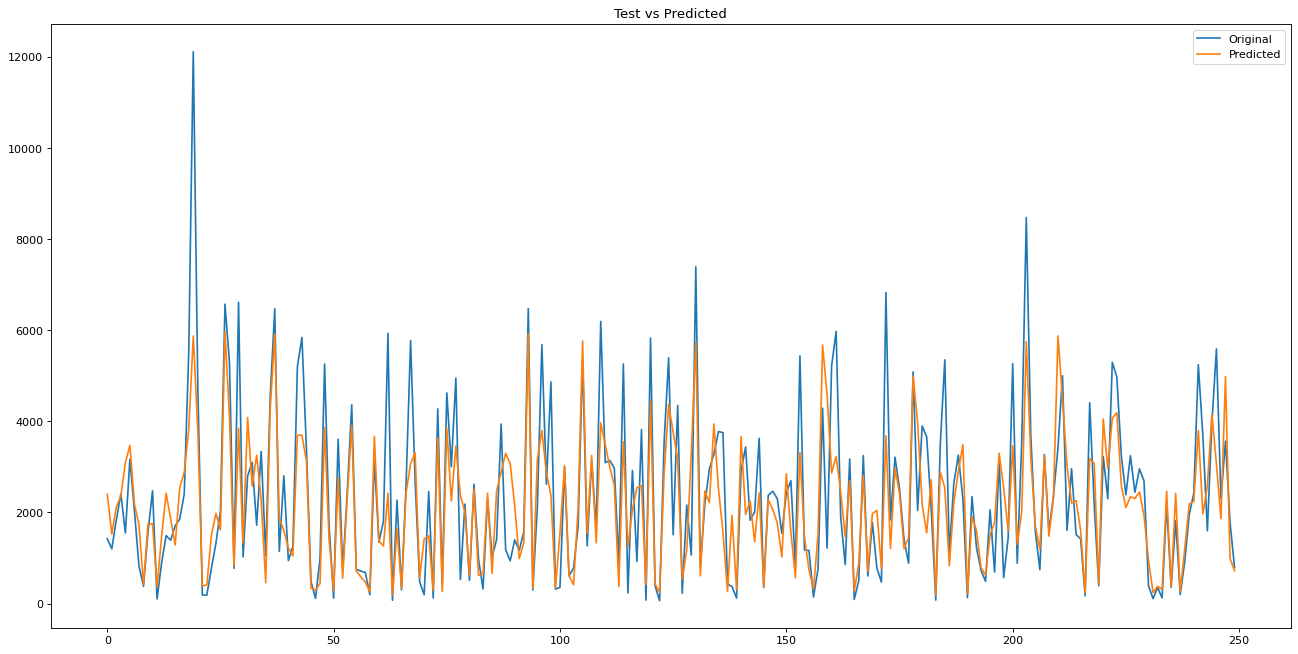

In [ ]:
x_train_copy, y_train_copy = x_train, y_train

#feature scaling
from sklearn.preprocessing import StandardScaler
s_x = StandardScaler()
s_y = StandardScaler()
x_train_copy = s_x.fit_transform(x_train_copy)
y_train_copy = s_y.fit_transform(y_train_copy.values.reshape(-1,1))

#svr regression
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train_copy,y_train_copy)
pred = s_y.inverse_transform(svr.predict(s_x.fit_transform(x_test)))
rmse = sqrt(mean_squared_error(y_test, pred))
print("SVR Root mean square error:",rmse)
plot_result(y_test,pred)

Decison tree root mean square error: 1092.6781215354279


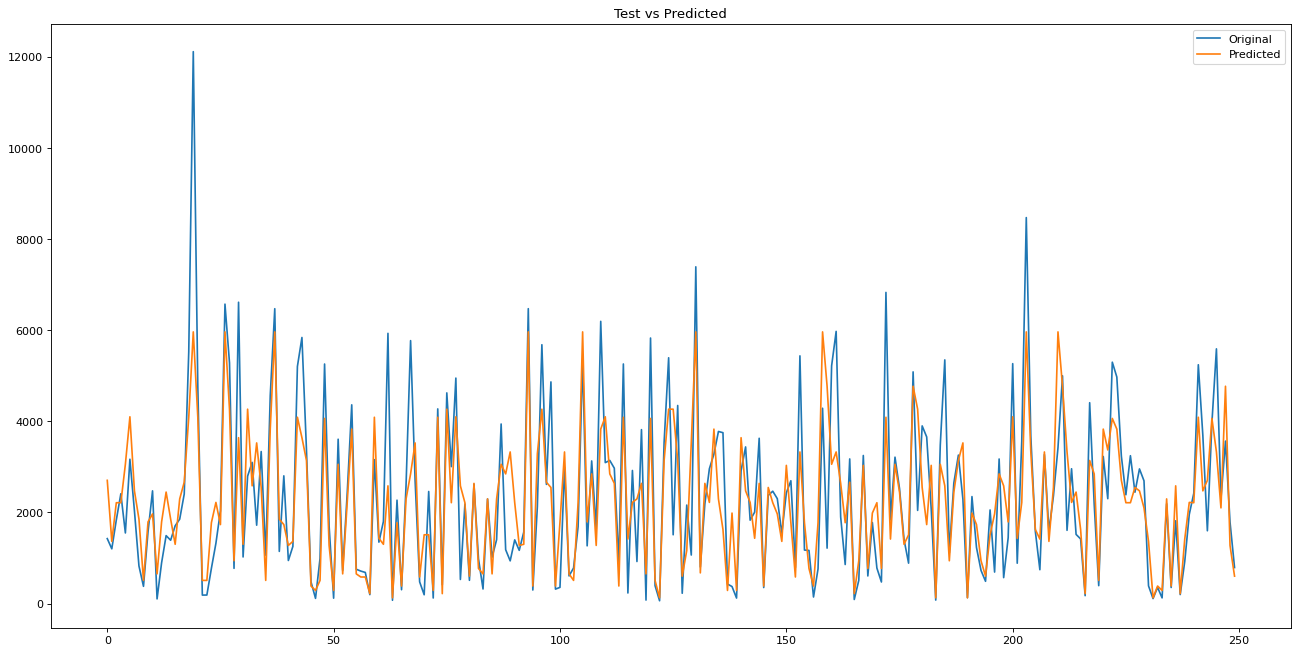

In [ ]:
#decision tree 
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100,random_state = 2)
dt.fit(x_train,y_train)
pred = dt.predict(x_test) 
rmse = sqrt(mean_squared_error(y_test, pred))
print("Decison tree root mean square error:",rmse)
plot_result(y_test,pred)

[11:09:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost root mean square error: 1102.2411335659456


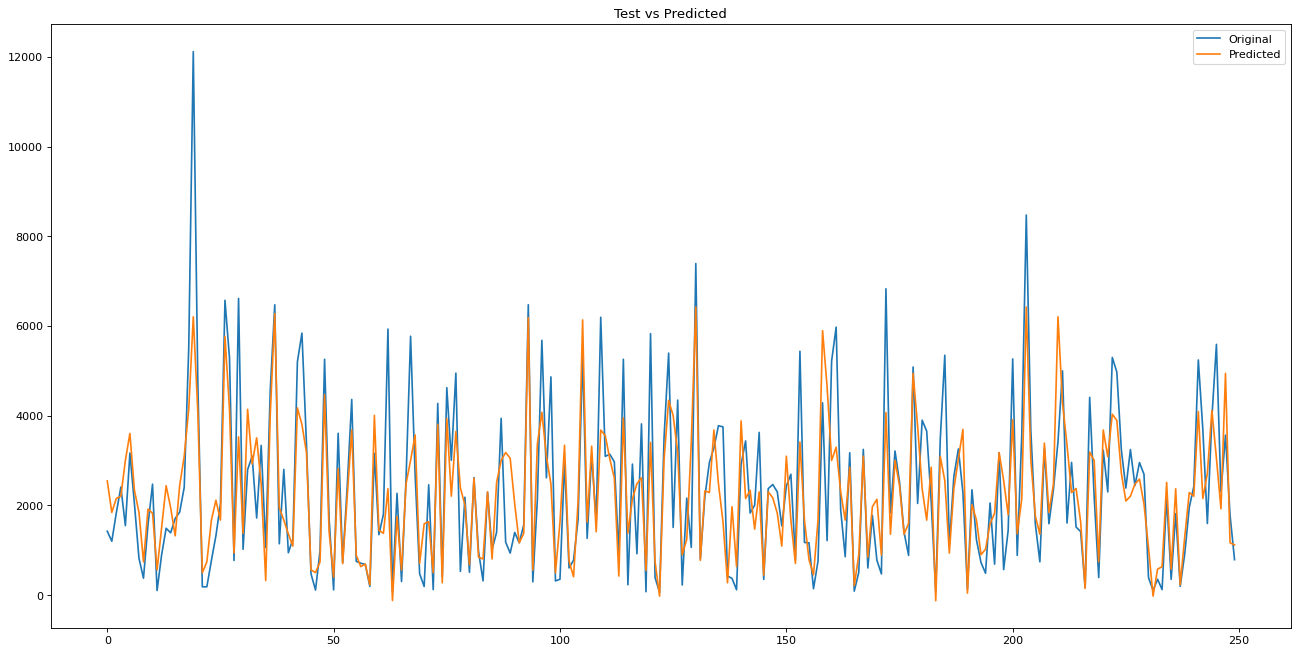

In [ ]:
#xgboost
from xgboost.sklearn import XGBRegressor
XGB = XGBRegressor()
XGB.fit(x_train, y_train)
pred = XGB.predict(x_test)
pred = pred.astype(int) 
rmse = sqrt(mean_squared_error(y_test, pred))
print("XGBoost root mean square error:",rmse)
plot_result(y_test,pred)